# Prédiction du Temps de Course avec Scikit-Learn

Dans cet exercice, nous allons entraîner un modèle de **régression linéaire** avec **Scikit-Learn** pour prédire le temps total d'une course de voiture en fonction des performances du joueur.

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    

## 1. Génération des données simulées

In [13]:

def generate_racing_data(n_samples=500):
    np.random.seed(42)
    data = {
        'temps_moyen_tour': np.random.uniform(50, 120, n_samples),  # Temps moyen en secondes
        'virages_reussis': np.random.randint(5, 20, n_samples),  # Nombre de virages réussis
        'utilisation_boost': np.random.uniform(0, 1, n_samples),  # % de boost utilisé
        'experience_joueur': np.random.randint(1, 10, n_samples),  # Expérience sur 10
    }
    data['temps_total_course'] = (
        data['temps_moyen_tour'] * 5 +  # 5 tours par course
        (20 - data['virages_reussis']) * 1.5 +  # Pénalité pour virages ratés
        (1 - data['utilisation_boost']) * 10 -  # Gain de temps grâce au boost
        data['experience_joueur'] * 2 +  # Les joueurs expérimentés sont plus rapides
        np.random.normal(0, 2, n_samples)  # Ajout d'un bruit gaussien
    )
    return pd.DataFrame(data)

df = generate_racing_data()
df.head()
    

,temps_moyen_tour,virages_reussis,utilisation_boost,experience_joueur,temps_total_course
0,76.217808,10,0.752403,2,392.965933
1,116.550001,19,0.706980,8,571.883299
2,101.239576,5,0.778572,8,516.813753
3,91.906094,13,0.143128,1,469.822333
4,60.921305,5,0.204545,8,318.845003


## 2. Visualisation des données

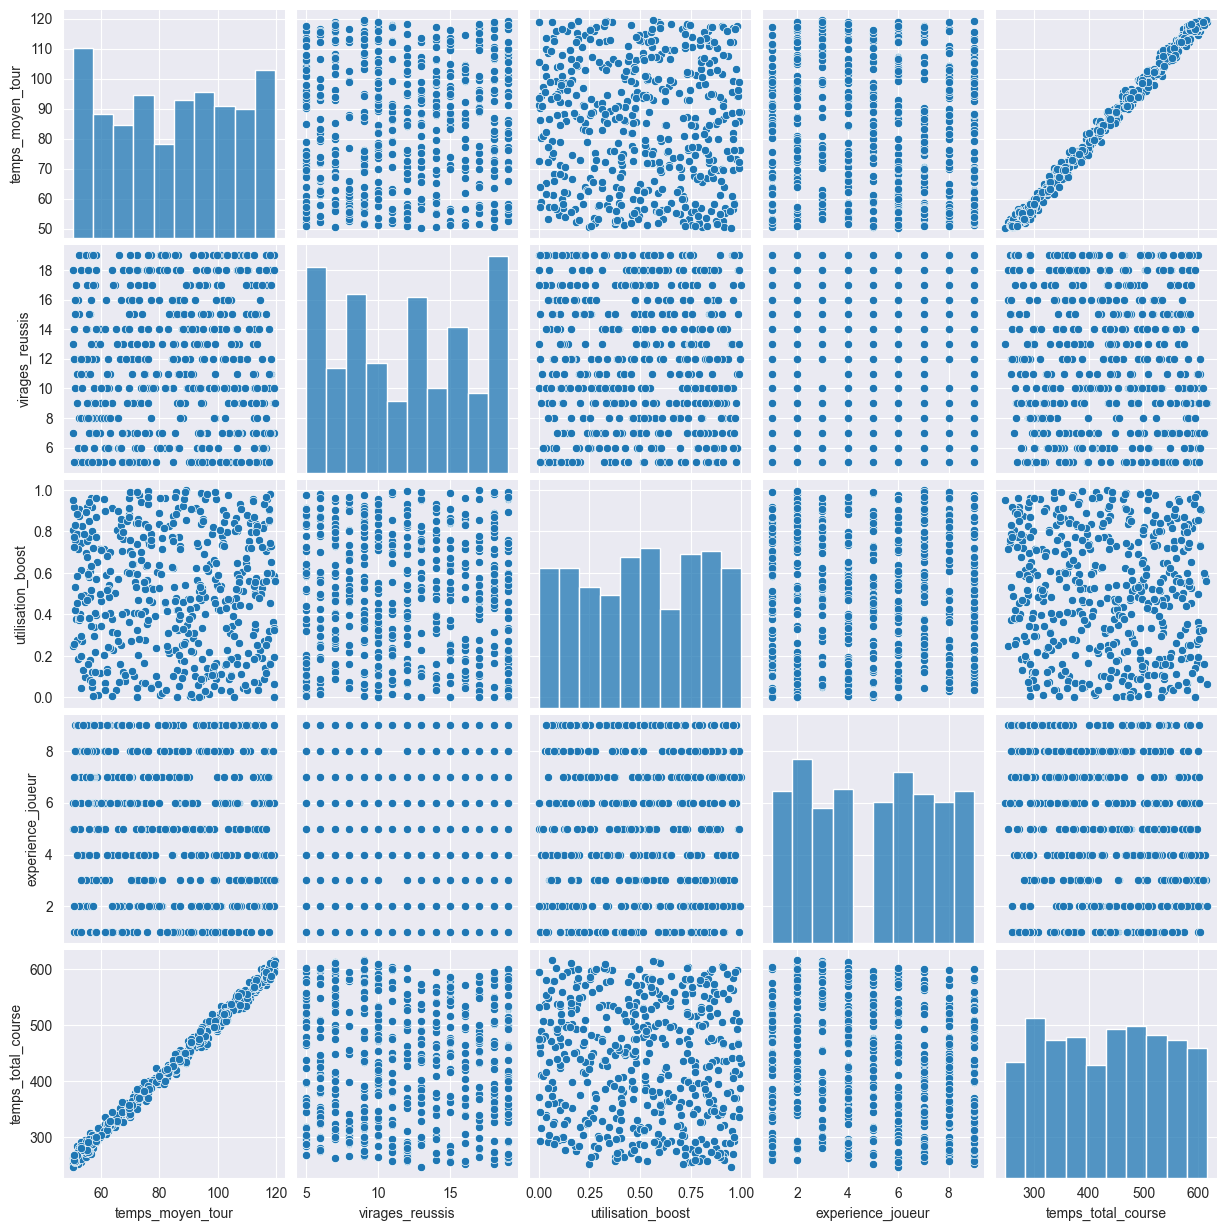

In [14]:

sns.pairplot(df)
plt.show()
    

## 3. Préparation des données

In [15]:

X = df.drop(columns=['temps_total_course'])  # Features
y = df['temps_total_course']  # Cible

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    

## 4. Entraînement du modèle de régression linéaire

In [16]:

model = LinearRegression()
model.fit(X_train, y_train)
    

LinearRegression()

## 5. Évaluation du modèle

Mean Absolute Error: 1.4333480863381611
Mean Squared Error: 3.19513094742364
R² Score: 0.9996976861893067

Poids des features:
             Feature       Poids
0   temps_moyen_tour  104.962129
1    virages_reussis   -6.679747
2  utilisation_boost   -2.939689
3  experience_joueur   -5.214035


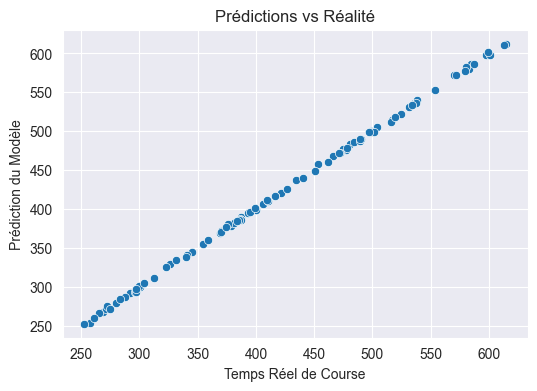

In [19]:

y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Temps Réel de Course")
plt.ylabel("Prédiction du Modèle")
plt.title("Prédictions vs Réalité")
plt.show()
    

## 6. Prédiction sur de nouvelles données

In [18]:

nouveau_joueur = np.array([[85, 15, 0.8, 7]])  # Exemple de joueur
nouveau_joueur_df = pd.DataFrame(nouveau_joueur, columns=X.columns)
nouveau_joueur_scaled = scaler.transform(nouveau_joueur_df)
resultat = model.predict(nouveau_joueur_scaled)
print(f"Le modèle prédit un temps total de course de {resultat[0]:.2f} secondes.")
    

Le modèle prédit un temps total de course de 420.50 secondes.
